In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\tanee\Downloads\archive (20)\heart_disease_dataset.csv")

## DATASET

In [3]:
df

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Female,269,111,86,Never,Heavy,5,No,Yes,Yes,10,120,No,Non-anginal Pain,1
996,78,Female,334,145,76,Never,NaN,6,No,No,No,10,196,Yes,Typical Angina,1
997,79,Male,151,179,81,Never,Moderate,4,Yes,No,Yes,8,189,Yes,Asymptomatic,0
998,60,Female,326,151,68,Former,NaN,8,Yes,Yes,No,5,174,Yes,Atypical Angina,1


## EXPLORATORY DATA ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [5]:
df.duplicated().sum()

0

No duplicate records present in the dataset

In [6]:
df.isnull().sum() 

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64

In [7]:
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

In [8]:
df['Alcohol Intake'].fillna("Unknown",inplace=True)

34% records in the Alcohol Intake column are missing and have been replaced by the keyword "Unknown"

In [9]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [10]:
df.corr(numeric_only=True)

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
Age,1.000000,-0.010673,0.002093,0.029027,-0.021366,-0.045555,-0.041676,0.646871
Cholesterol,-0.010673,1.000000,0.021841,-0.008527,0.016124,0.090458,0.002484,0.365041
Blood Pressure,0.002093,0.021841,1.000000,-0.001675,0.011924,0.002257,-0.053516,0.006900
Heart Rate,0.029027,-0.008527,-0.001675,1.000000,-0.013541,-0.040504,0.010240,0.013209
Exercise Hours,-0.021366,0.016124,0.011924,-0.013541,1.000000,-0.006957,-0.034503,-0.014226
Stress Level,-0.045555,0.090458,0.002257,-0.040504,-0.006957,1.000000,-0.007918,0.007071
Blood Sugar,-0.041676,0.002484,-0.053516,0.010240,-0.034503,-0.007918,1.000000,-0.013004
Heart Disease,0.646871,0.365041,0.006900,0.013209,-0.014226,0.007071,-0.013004,1.000000


<Axes: >

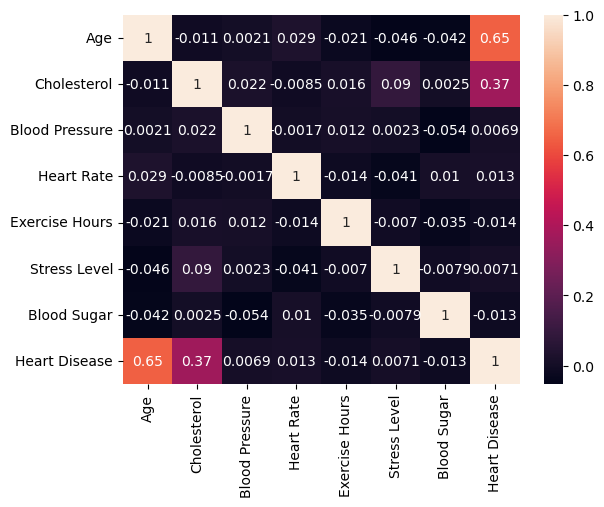

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

There is a strong linear relationship between heart disease and age as well as heart disease and cholesterol

Text(0.5, 1.0, 'Age Distribution')

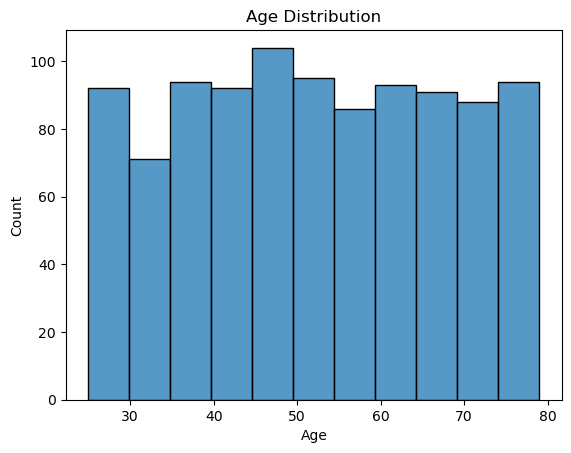

In [12]:
sns.histplot(data=df,x='Age')
plt.title("Age Distribution")

Age group varying from 25 to 79 years of age

In [13]:
df['Gender'].value_counts()

Gender
Female    503
Male      497
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

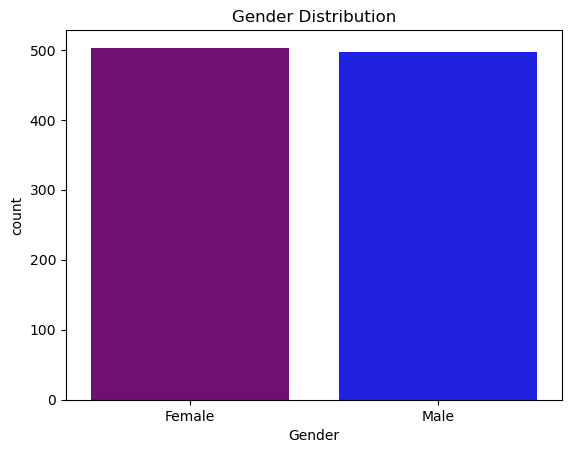

In [14]:
sns.countplot(x='Gender', hue='Gender', data=df,
              palette={'Male': 'blue', 'Female': 'purple'},
              legend=False)
plt.title("Gender Distribution")

Almost the same number of males and females

<Axes: xlabel='Heart Rate', ylabel='Count'>

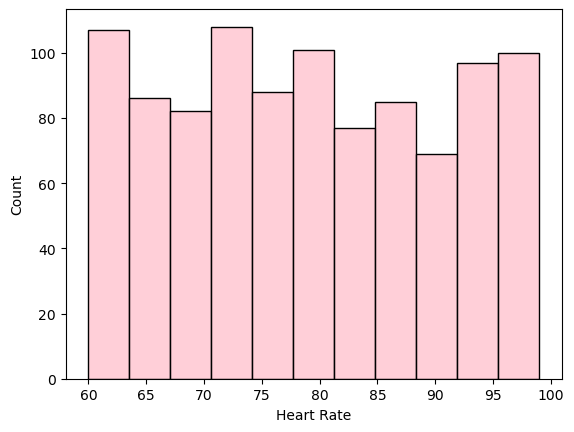

In [15]:
sns.histplot(data=df,x='Heart Rate',color='pink')

In [16]:
df['Smoking'].value_counts()

Smoking
Never      338
Current    336
Former     326
Name: count, dtype: int64

Text(0.5, 1.0, 'Smoking Pattern')

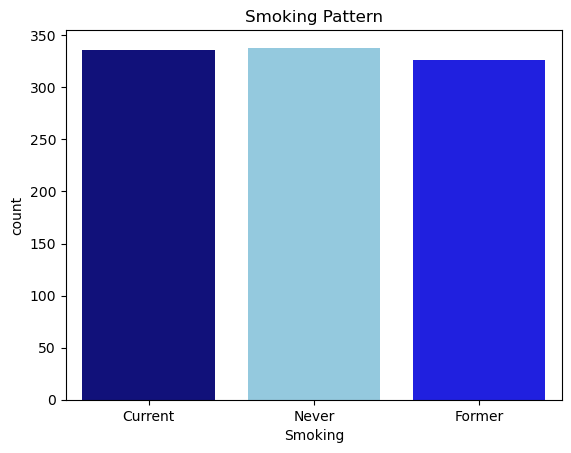

In [17]:
sns.countplot(x=df['Smoking'],hue='Smoking', data=df,
              palette={'Current': 'darkblue', 'Never': 'skyblue','Former':'blue'},
              legend=False)
plt.title("Smoking Pattern")

Almost same number of current former smokers and people who never smoked

In [18]:
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Unknown     340
Moderate    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Alcohol Consumption Pattern')

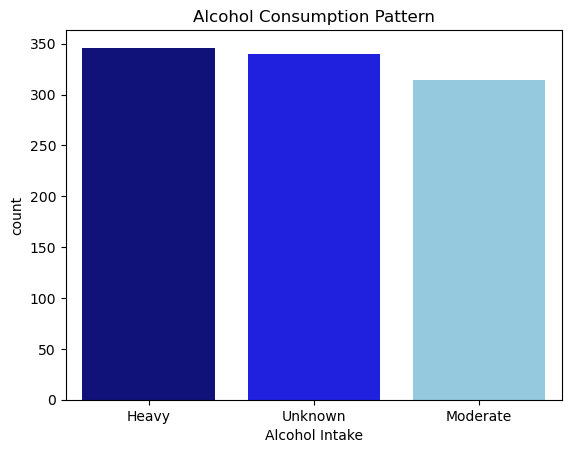

In [19]:
sns.countplot(x=df['Alcohol Intake'],hue='Alcohol Intake',data=df,
              palette={'Heavy': 'darkblue', 'Moderate': 'skyblue','Unknown':'blue'},
              legend=False)
plt.title("Alcohol Consumption Pattern")

34% Alcohol intake values are unknown. 

Text(0.5, 1.0, 'Exercise Hours Distribution')

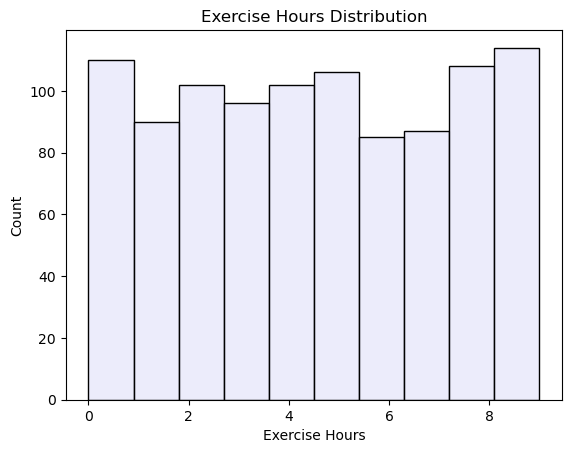

In [20]:
sns.histplot(data=df,x='Exercise Hours',bins=10,color='lavender')
plt.title("Exercise Hours Distribution")

In [21]:
df['Family History'].value_counts()

Family History
No     501
Yes    499
Name: count, dtype: int64

Text(0.5, 1.0, 'Family History Status')

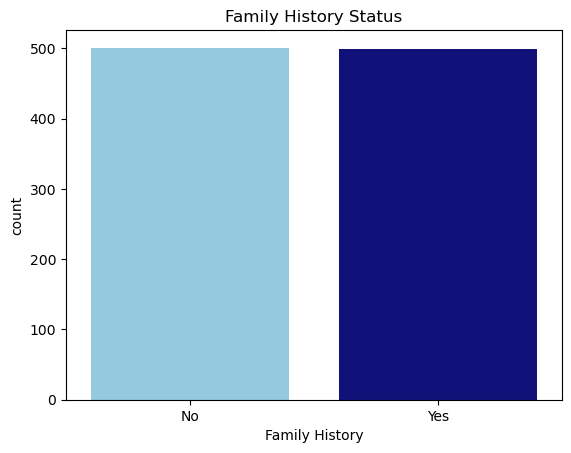

In [22]:
sns.countplot(x=df['Family History'],hue='Family History',data=df,
             palette={'Yes': 'darkblue', 'No': 'skyblue'},
              legend=False)
plt.title("Family History Status")

In [23]:
df['Diabetes'].value_counts()

Diabetes
Yes    505
No     495
Name: count, dtype: int64

Text(0.5, 1.0, 'Diabetes Status')

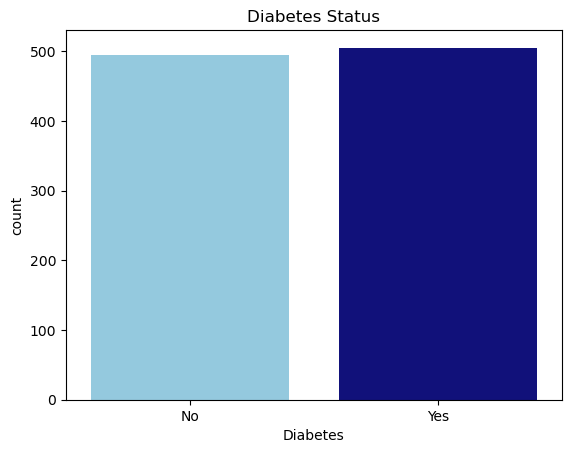

In [24]:
sns.countplot(x=df['Diabetes'],hue='Diabetes',data=df,
             palette={'Yes': 'darkblue', 'No': 'skyblue'},
              legend=False)
plt.title("Diabetes Status")

In [25]:
df['Obesity'].value_counts()

Obesity
No     501
Yes    499
Name: count, dtype: int64

Text(0.5, 1.0, 'Obesity Status')

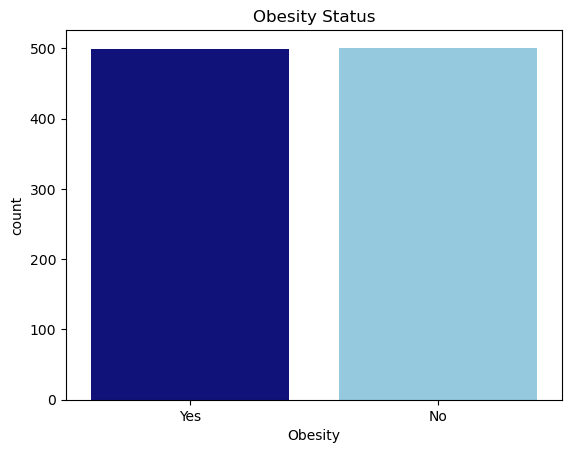

In [26]:
sns.countplot(x=df['Obesity'],hue='Obesity',data=df,
             palette={'Yes': 'darkblue', 'No': 'skyblue'},
              legend=False)
plt.title("Obesity Status")

For family history, diabetes and obesity columns number of people in the yes and no category are almost equal

In [27]:
df['Exercise Induced Angina'].value_counts()

Exercise Induced Angina
No     528
Yes    472
Name: count, dtype: int64

Text(0.5, 1.0, 'Exercise Induced Angina Status')

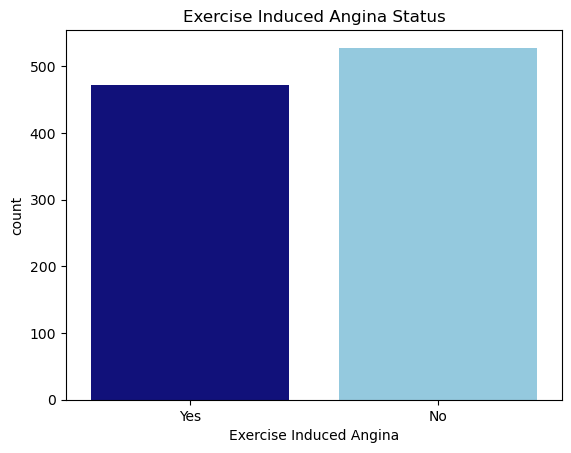

In [28]:
sns.countplot(x=df['Exercise Induced Angina'],hue='Exercise Induced Angina',data=df,
             palette={'Yes': 'darkblue', 'No': 'skyblue'},
              legend=False)
plt.title("Exercise Induced Angina Status")

In [29]:
df['Chest Pain Type'].value_counts()

Chest Pain Type
Non-anginal Pain    256
Typical Angina      250
Asymptomatic        248
Atypical Angina     246
Name: count, dtype: int64

Text(0.5, 1.0, 'Chest Pain Type')

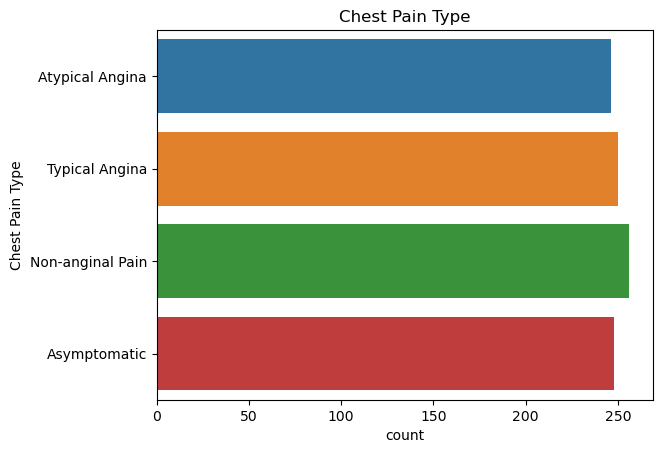

In [30]:
sns.countplot(y=df['Chest Pain Type'],hue='Chest Pain Type',data=df)
plt.title("Chest Pain Type")

In [31]:
df['Heart Disease'].value_counts()

Heart Disease
0    608
1    392
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Status')

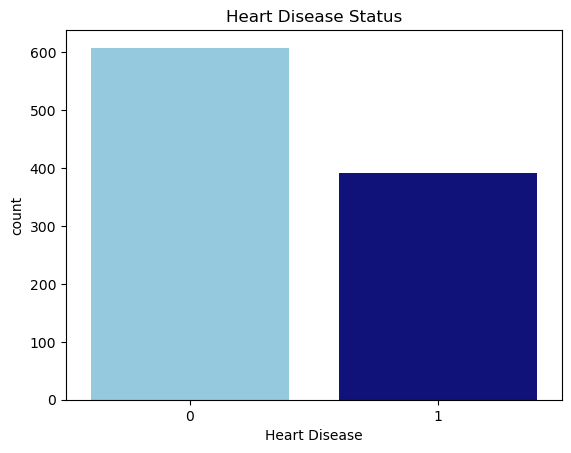

In [32]:
sns.countplot(x=df['Heart Disease'],hue='Heart Disease',data=df,
             palette={1: 'darkblue', 0: 'skyblue'},
              legend=False)
plt.title("Heart Disease Status")

39.2 % of the people have heart disease while 60.8% of the people do not

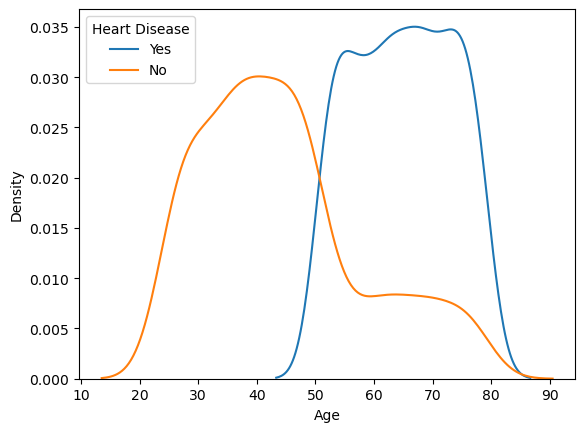

In [33]:
sns.kdeplot(df[df['Heart Disease']==1]['Age'],label='Yes')
sns.kdeplot(df[df['Heart Disease']==0]['Age'],label='No')
plt.legend(title='Heart Disease')

People with heart disease are more likely to be of older age group

In [34]:
df[df['Heart Disease']==1]['Age'].min()

51

The youngest person to have a heart disease is of 51 years of age

<Axes: xlabel='Heart Disease', ylabel='Age'>

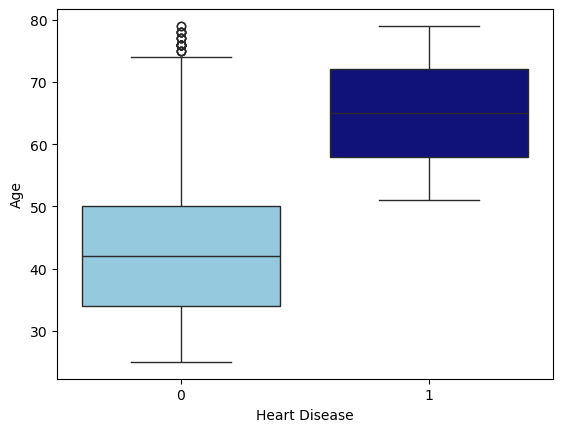

In [47]:
sns.boxplot(data=df,y='Age',x='Heart Disease',hue='Heart Disease',palette={1: 'darkblue', 0: 'skyblue'},
              legend=False)

In [36]:
Q1 = df[df['Heart Disease']==0]['Age'].quantile(0.25)
Q3 = df[df['Heart Disease']==0]['Age'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
upper_bound

74.0

In [37]:
df[(df['Age']>=upper_bound) & (df['Heart Disease']==0)].shape

(30, 16)

There are 30 people above the age of 74 years who do not have heart disease acting as outliers which could possibly indicate impact of other factors 

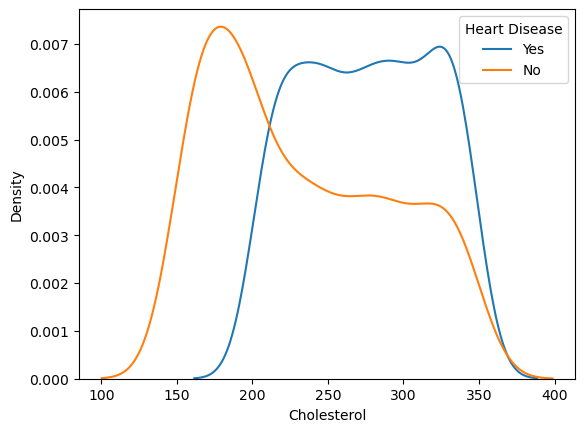

In [38]:
sns.kdeplot(df[df['Heart Disease']==1]['Cholesterol'],label='Yes')
sns.kdeplot(df[df['Heart Disease']==0]['Cholesterol'],label='No')
plt.legend(title='Heart Disease')

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

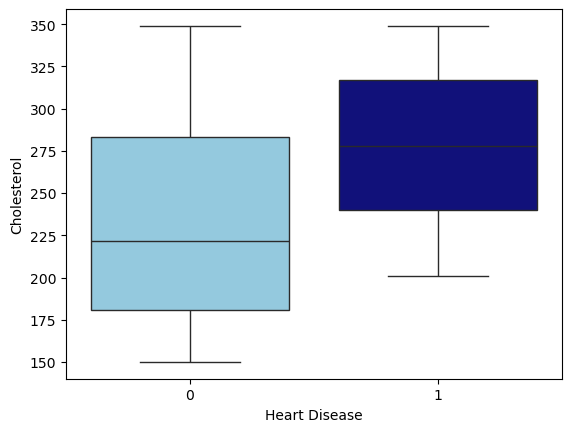

In [48]:
sns.boxplot(data=df,y='Cholesterol',x='Heart Disease',hue='Heart Disease',palette={1: 'darkblue', 0: 'skyblue'},
              legend=False)

People with heart diseases are more likely to have cholestrol above 200

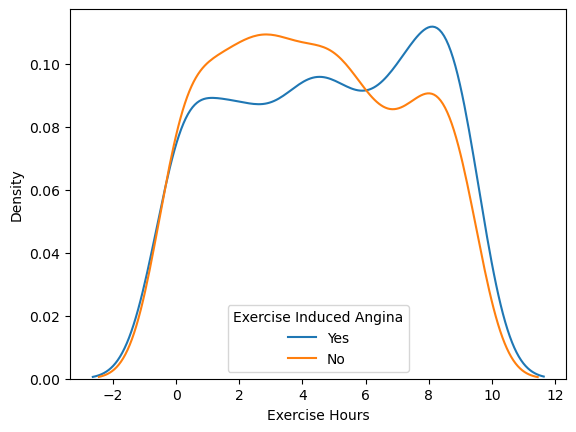

In [40]:
sns.kdeplot(df[df['Exercise Induced Angina']=='Yes']['Exercise Hours'],label='Yes')
sns.kdeplot(df[df['Exercise Induced Angina']=='No']['Exercise Hours'],label='No')
plt.legend(title='Exercise Induced Angina')

People with Exercise Induced Angina are more likely to be those who exercise for more number of hours

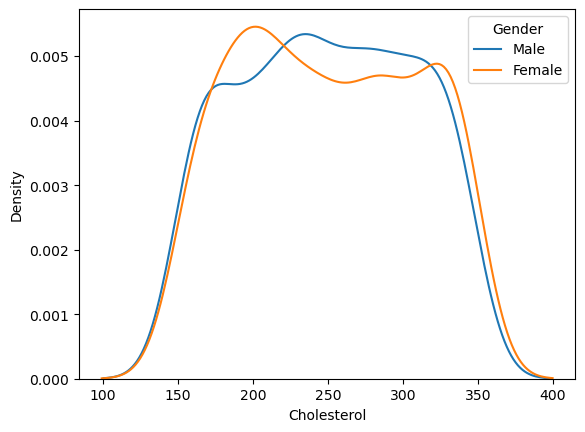

In [41]:
sns.kdeplot(df[df['Gender']=='Male']['Cholesterol'],label='Male')
sns.kdeplot(df[df['Gender']=='Female']['Cholesterol'],label='Female')
plt.legend(title='Gender')

Males are slightly more likely to have a higher cholestrol than females

<Axes: xlabel='Blood Pressure', ylabel='Count'>

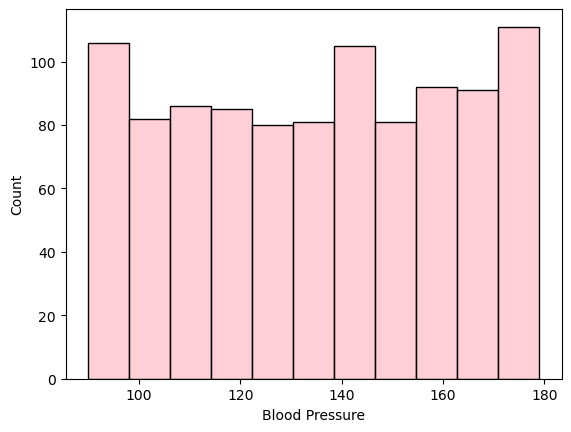

In [42]:
sns.histplot(data=df,x='Blood Pressure',color='pink')

In [43]:
df[df['Blood Pressure']>=120].shape

(667, 16)

66% people having higher blood presssure

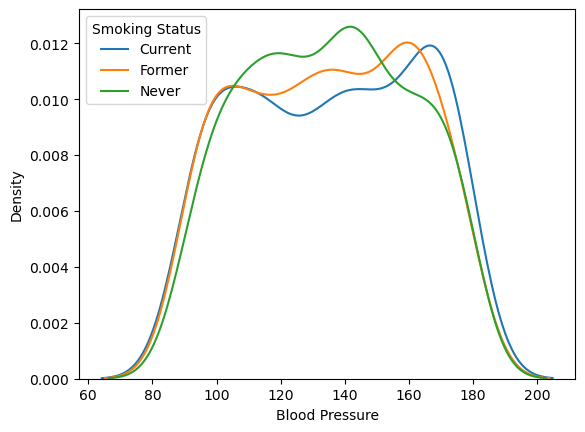

In [44]:
sns.kdeplot(df[df['Smoking']=='Current']['Blood Pressure'],label='Current')
sns.kdeplot(df[df['Smoking']=='Former']['Blood Pressure'],label='Former')
sns.kdeplot(df[df['Smoking']=='Never']['Blood Pressure'],label='Never')
plt.legend(title='Smoking Status')

People who never smoked are more likely to have a less blood pressure near to normal

## SUMMARY

- The dataset displays the heart disease status of 1000 people along with other factors such as blood pressure, heart rate etc.

- There is a split of 40 - 60 between people those who have heart disease and those who do not

- The age group of people in the dataset varies from 25 to 79 years of age. People with heart disease are generally those who are comparatively older in age. The youngest person to have a heart disease is of 51 years.

- There are 30 people above the age of 74 years who do not have heart disease indicating the impact of other factors

- There is also a strong relationship between cholestrol and heart disease status. People having heart disease are more likely to have a cholestrol above the level of 200

There are also other relationships present such as:

- Males are slightly more likely to have a higher cholestrol than females

- People who have Exercise Induced Angina are generally  those who exercise for more number of hours i.e over 6 hours per week

- 34% values in the Alcohol Intake column were missing . Only heavy and moderate sub categories were present. One of the possibilities could be that the missing values could be people who drink occasionaly or people who have never consumed alcohol.

- Majority of people 66 % are having blood pressure above the healthy range of 120 indicating presence of blood pressure problems in the people under consideration

- Another thing to be noted is that people who never smoked tend to have comparatively lower blood pressure than the current and the former smokers

- Also, the expected strong relationship between blood pressure , heart rate and heart disease could not be found  